# 결정 트리(Decision Tree)
- 분류와 회귀에 사용되는 지도 학습 방법
- 데이터 특성으로부터 추론된 결정 규칙을 통해 값을 예측
- if-then-else 결정 규칙을 통해 데이터 학습
- 트리의 깊이가 깊을 수록 복잡한 모델
- 결정 트리 장점 
1) 이해와 해석이 쉽다.
2) 시각화가 용이하다
3) 많은 데이터 전처리가 필요하지 않다.
4) 수치형과 범주형 데이터 모두를 다를 수 있다.


In [2]:
import pandas as pd 
import numpy as np
import graphviz 
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [4]:
# 붓꽃

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [5]:
# 와인 
wine = load_wine()

In [6]:
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
print(wine_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [7]:
# 유방암
cancer = load_wine()
cancer_df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
print(cancer_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [8]:
# 보스톤

boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [9]:
# 당뇨병

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
print(diabetes_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.0176

## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [10]:
x = [[0,0],[1,1]]
y = [0,1]

model = tree.DecisionTreeClassifier()
model = model.fit(x,y)

In [11]:
model.predict([[2.,2.]])   # 데이터를 줬을 때 1를 받았다. 

array([1])

In [12]:
model.predict_proba([[2.,2.]])   # 확률적으로 어느 쪽이 가까운지 알려주낟.

array([[0., 1.]])

In [13]:
# 전처리 전 학습
model = DecisionTreeClassifier()

In [14]:
cross_val_score(
    estimator=model,
    X =iris.data, y=iris.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [15]:
# 전처리 후 학습 : 결정 트리는 '규칙'을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [16]:
cross_val_score(
    estimator=model,
    X =iris.data, y=iris.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [17]:
# 학습된 결정 트리 시각화
model = DecisionTreeClassifier()
model.fit(iris.data,iris.target)


DecisionTreeClassifier()

In [18]:
r = tree.export_text(decision_tree=model,
                     feature_names = iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

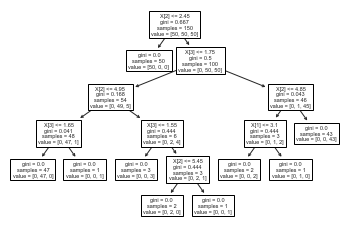

In [19]:
tree.plot_tree(model)

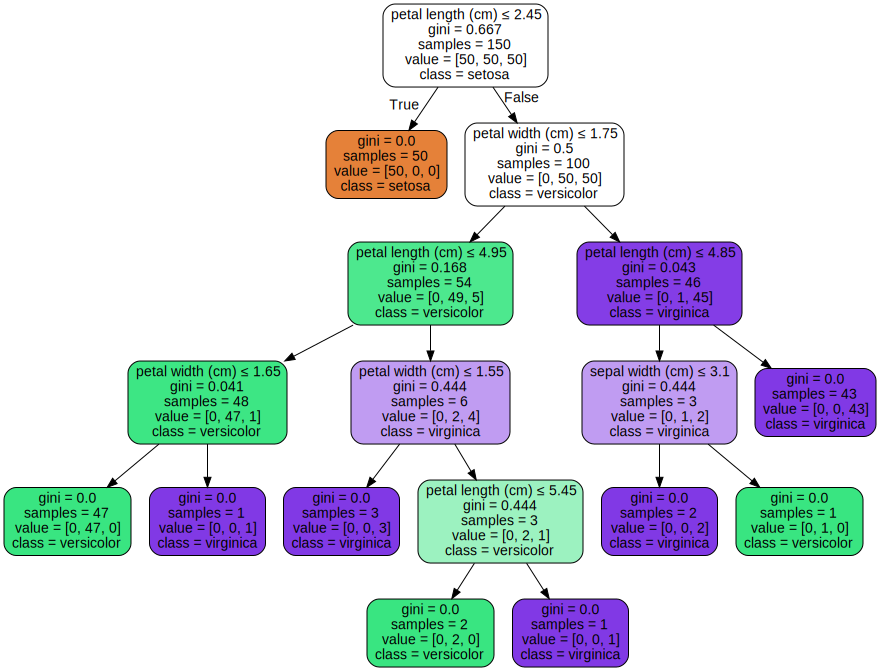

In [20]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,
                                special_characters = True)

graph = graphviz.Source(dot_data)
graph

In [21]:
# 시각화
n_classes = 3 
plot_colors = 'ryb'
plot_step = 0.02

(0.0, 7.88, -0.9, 3.4800000000000044)

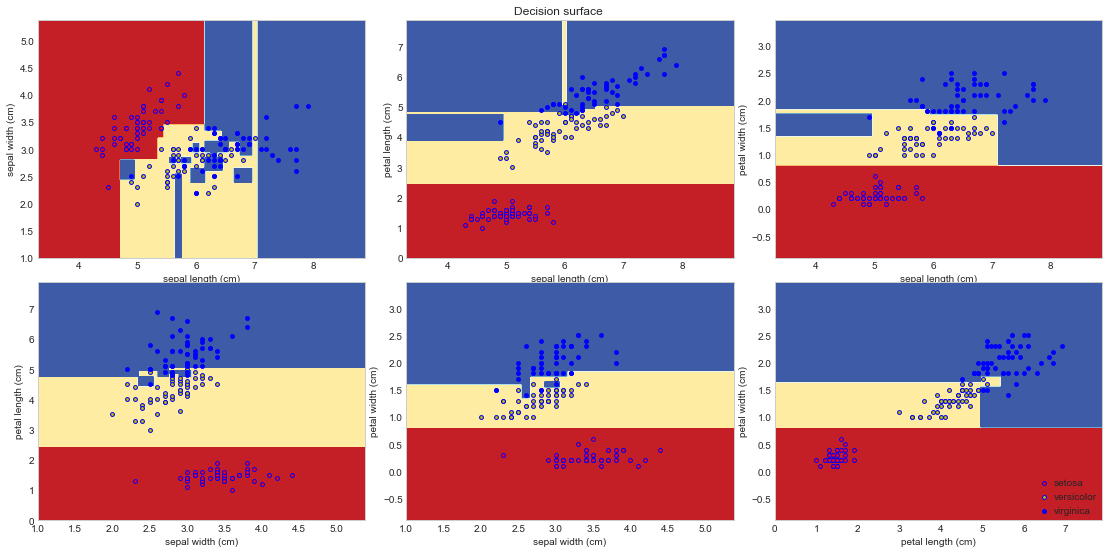

In [24]:
# 결정경계 시각화

plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                                [1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    plt.subplot(2,3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where( y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                    cmap = plt.cm.RdYlBu, edgecolor = 'b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

(0.0, 7.88, -0.9, 3.4800000000000044)

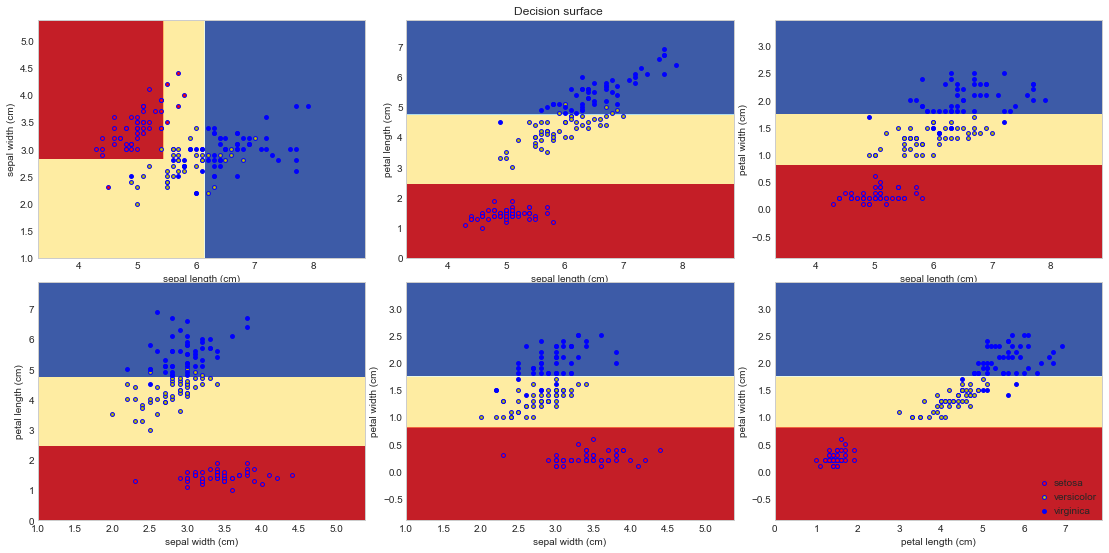

In [26]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                                [1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    plt.subplot(2,3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where( y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                    cmap = plt.cm.RdYlBu, edgecolor = 'b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

In [29]:
model = DecisionTreeClassifier()

In [30]:
cross_val_score(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.91666667, 0.83333333, 0.91666667, 0.91428571, 0.85714286])

In [31]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [32]:
cross_val_score(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.94444444, 0.80555556, 0.88888889, 0.91428571, 0.85714286])

In [33]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

In [34]:
r = tree.export_text(decision_tree=model,
                     feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- ash <= 2.45
|   |   |   |   |--- class: 1
|   |   |   |--- ash >  2.45
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- proline <= 655.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- proline >  655.00
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- hue <= 0.80
|   |   |   |--- class: 2
|   |   |--- hue >  0.80
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |   |   |--- class: 0
|   |   |--

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[2] <= 2.45\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61

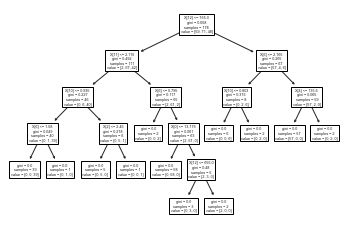

In [35]:
tree.plot_tree(model)

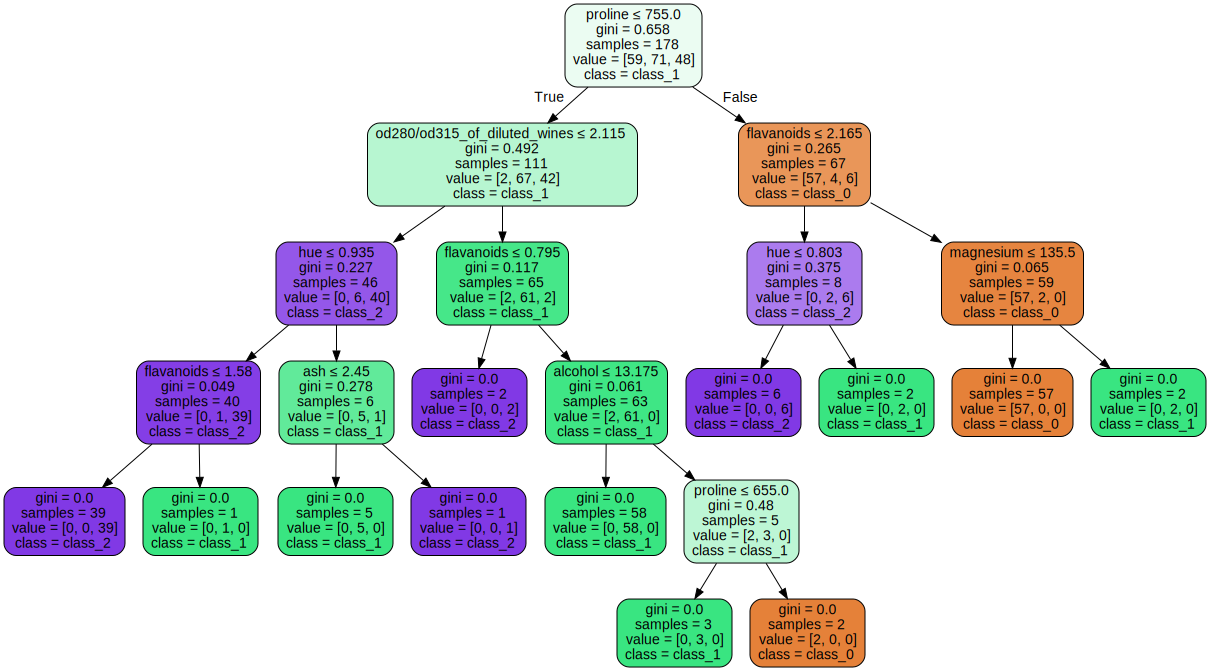

In [38]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = wine.feature_names,
                                class_names=wine.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [39]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

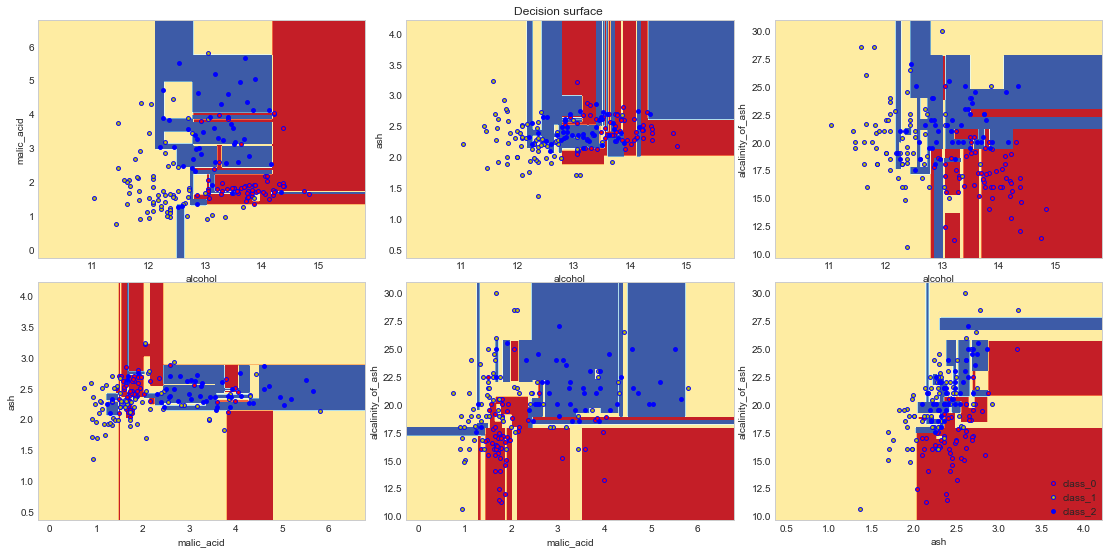

In [43]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                                [1,2],[1,3],[2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    plt.subplot(2,3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where( y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = wine.target_names[i],
                    cmap = plt.cm.RdYlBu, edgecolor = 'b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

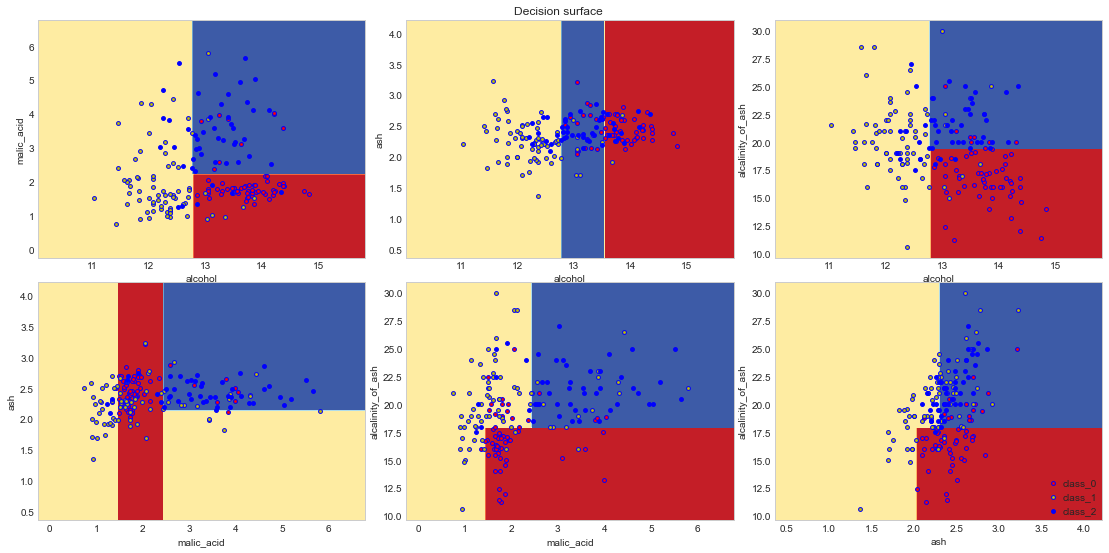

In [42]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                                [1,2],[1,3],[2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    plt.subplot(2,3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where( y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = wine.target_names[i],
                    cmap = plt.cm.RdYlBu, edgecolor = 'b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

In [44]:
# 유방암 데이터

model = DecisionTreeClassifier()


In [45]:
cross_val_score(
    estimator=model,
    X = cancer.data, y = cancer.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.91666667, 0.83333333, 0.83333333, 0.91428571, 0.85714286])

In [46]:
# 전처리 후 학습

model= make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

cross_val_score(
    estimator=model,
    X = cancer.data, y = cancer.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.91666667, 0.80555556, 0.83333333, 0.91428571, 0.85714286])

In [47]:
model=DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

In [48]:
r = tree.export_text(decision_tree=model)
print(r)

|--- feature_12 <= 755.00
|   |--- feature_11 <= 2.11
|   |   |--- feature_10 <= 0.94
|   |   |   |--- feature_6 <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- feature_6 >  1.58
|   |   |   |   |--- class: 1
|   |   |--- feature_10 >  0.94
|   |   |   |--- feature_1 <= 2.39
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.39
|   |   |   |   |--- class: 2
|   |--- feature_11 >  2.11
|   |   |--- feature_6 <= 0.80
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.80
|   |   |   |--- feature_0 <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  13.17
|   |   |   |   |--- feature_1 <= 2.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.12
|   |   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_6 <= 2.17
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  2.17
|   |   |--- feature_9 <= 3.43
|   |   |   |--- class: 1
|   |  

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[1] <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 6

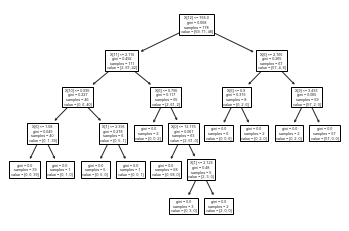

In [49]:
tree.plot_tree(model)

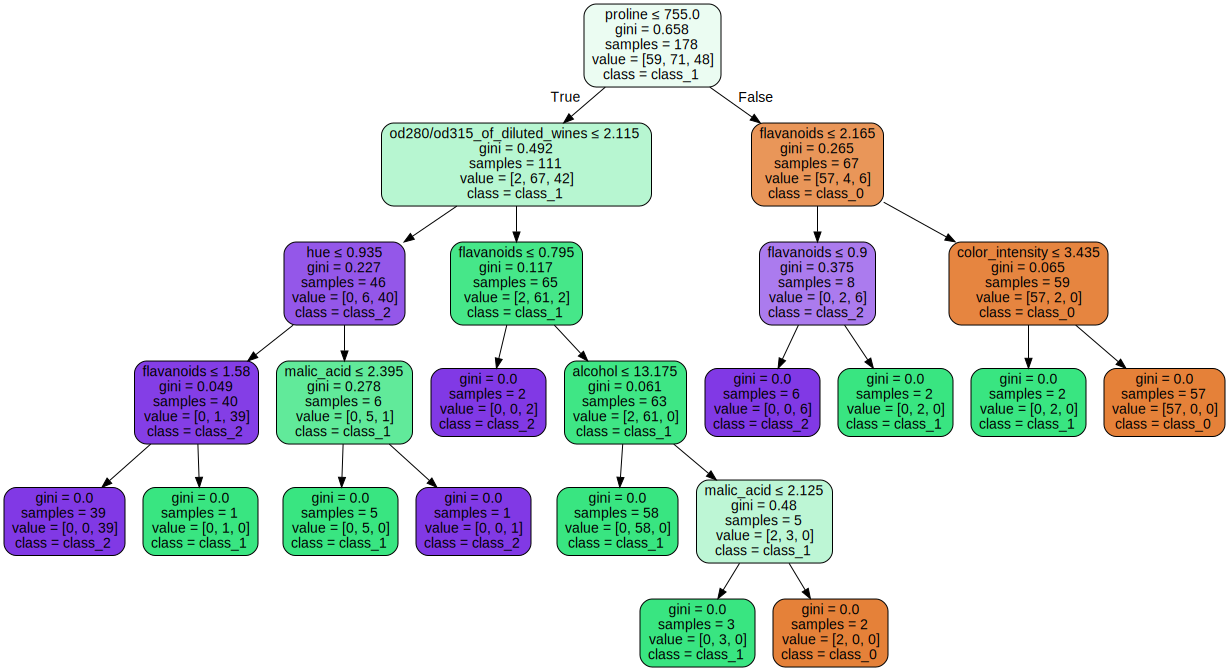

In [56]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = cancer.feature_names,
                                class_names = cancer.target_names,
                                filled=True, rounded = True,
                                special_characters = True    
)

graph = graphviz.Source(dot_data)
graph